In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import requests
import re
from bs4 import BeautifulSoup as bs

In [2]:
# creating empty reviews list 
cannon_reviews=[]
#forest = ["the","king","of","jungle"]

for i in range(1,40):
    ip=[]  
    #url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
    url = "https://www.amazon.in/Canon-EOS-77D-24-2MP-Digital/product-reviews/B06Y2RSYN7"
    response = requests.get(url)
    soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    reviews = soup.findAll("div",attrs={'class':'a-row a-spacing-small review-data'})# Extracting the content under specific tags  
    for i in range(len(reviews)):
        ip.append(reviews[i].text)  
    cannon_reviews=cannon_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews


In [3]:
cannon_reviews

['\n\n  1. Nice product2. Too late delivery(reached 10days after promised final date of delivery)3. Good packing4. Efs18-55mm f4-5.6 lens is average. poor quality on low light.(feels like used one)5. Had issues with warranty registration, but solved it by contacting canon.(got 1+1year warranty for body and lens.)6. Package includes: EOS 77D Body, EF-S 18-55mm 4-5.6 IS STM, Lens Cap, Battery Pack, Battery Charger, Eye Cup,camera strap,camera bag, 16gb SD card.7. Worth for money (49800-offer.  please dont think second time if u found an offer like this.)8. Best mid range dslr camera\n\n',
 "\n\n  Before buying this camera I did lot of research, I am at very beginner level of photography. The good feature I liked about video shooting with dual auto focus. this is very cool features, It gives picture quality like cinematography. Really amazing, apart from video quality picture quality is awesome. Still I am learning to shoot photos in manual mode abut overall amazing product. I did bought 

In [4]:
with open("cannon.txt","w",encoding='utf8') as output:
    output.write(str(cannon_reviews))

In [5]:
# Joinining all the reviews into single paragraph 
cn_rev_string = " ".join(cannon_reviews)
cn_rev_string

"\n\n  1. Nice product2. Too late delivery(reached 10days after promised final date of delivery)3. Good packing4. Efs18-55mm f4-5.6 lens is average. poor quality on low light.(feels like used one)5. Had issues with warranty registration, but solved it by contacting canon.(got 1+1year warranty for body and lens.)6. Package includes: EOS 77D Body, EF-S 18-55mm 4-5.6 IS STM, Lens Cap, Battery Pack, Battery Charger, Eye Cup,camera strap,camera bag, 16gb SD card.7. Worth for money (49800-offer.  please dont think second time if u found an offer like this.)8. Best mid range dslr camera\n\n \n\n  Before buying this camera I did lot of research, I am at very beginner level of photography. The good feature I liked about video shooting with dual auto focus. this is very cool features, It gives picture quality like cinematography. Really amazing, apart from video quality picture quality is awesome. Still I am learning to shoot photos in manual mode abut overall amazing product. I did bought this 

In [6]:
# Removing unwanted symbols incase if exists
cn_rev_string = re.sub("[^A-Za-z" "]+"," ",cn_rev_string).lower()
cn_rev_string = re.sub("[0-9" "]+"," ",cn_rev_string)

In [7]:
# words that contained in cannon
cn_reviews_words = cn_rev_string.split(" ")

In [8]:
stop_words = stopwords.words('english')

with open("Datasets/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

In [9]:
cn_reviews_words = [w for w in cn_reviews_words if not w in stopwords]

In [10]:
# Joinining all the reviews into single paragraph 
cn_rev_string = " ".join(cn_reviews_words)

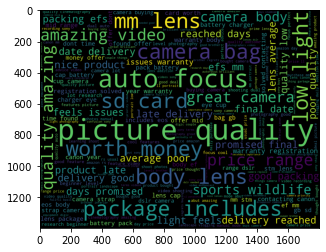

In [11]:

# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_cn = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(cn_rev_string)

plt.imshow(wordcloud_cn)

In [12]:
# positive words # Choose the path for +ve words stored in system
with open("Datasets/positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
poswords = poswords[36:]

In [13]:
# negative words  Choose path for -ve words stored in system
with open("Datasets/negative-words.txt","r") as neg:
    negwords = neg.read().split("\n")

negwords = negwords[37:]

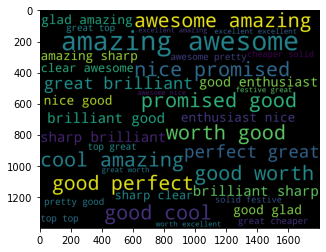

In [14]:
cn_pos_in_pos = " ".join ([w for w in cn_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(cn_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)

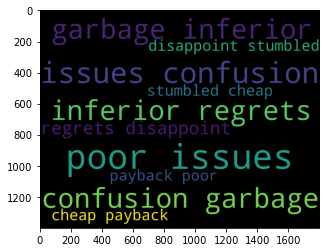

In [15]:
cn_neg_in_neg = " ".join ([w for w in cn_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(cn_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
